In [450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import beta, gamma, lognorm, norm
import warnings

warnings.filterwarnings("ignore", message="divide by zero encountered in log")
warnings.filterwarnings("ignore", message="invalid value encountered in divide")
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")




In [492]:
df = pd.read_csv('Old_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001666 entries, 0 to 2001665
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   status          object 
 1   bed             float64
 2   bath            float64
 3   acre_lot        float64
 4   city            object 
 5   state           object 
 6   zip_code        float64
 7   house_size      float64
 8   prev_sold_date  object 
 9   price           float64
dtypes: float64(6), object(4)
memory usage: 152.7+ MB


### Null Percentage:

In [ ]:
nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent)

status             0.000000
bed               16.914210
bath              17.122037
acre_lot          20.921372
city               0.015037
state              0.000000
zip_code           0.025878
house_size        32.233150
prev_sold_date    49.691457
price              0.013539
dtype: float64


There is no feature with a null percentage exceeding 70% which means that the missing values can be dealt with rather than eliminating the column from the dataset

These statistics will be useful for encoding the categorical data (OHE)

### Correlation

In [ ]:
for i in df.columns[:9] :
    if df[i].dtype != "object":
        print("Correlation between",i, "and the label \"price\": ", round(df[i].corr(df["price"])*100,2))

Correlation between bed and the label "price":  16.01
Correlation between bath and the label "price":  27.79
Correlation between acre_lot and the label "price":  -0.1
Correlation between zip_code and the label "price":  -7.42
Correlation between house_size and the label "price":  14.15


There are no high correlations exist between the features and the label, so none will be redundant features. It is important to note that there exists a high correlation between the city,state and the zipcode as the city and the state are could be determined through the zip code. This will be dealt with later on.

### Fixing Data Types

In [493]:
df["bed"] = df["bed"].convert_dtypes(int)
df["bath"] = df["bath"].convert_dtypes(int)
df["zip_code"] = df["zip_code"].convert_dtypes(int)

df['zip_code'] = df['zip_code'].astype(str).fillna('')
df['zip_code'] = df['zip_code'].apply(lambda x: x.zfill(5))  

df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,00601,920.0,NaN,105000.0
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,00601,1527.0,NaN,80000.0
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,00795,748.0,NaN,67000.0
3,for_sale,4,2,0.10,Ponce,Puerto Rico,00731,1800.0,NaN,145000.0
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,00680,NaN,NaN,65000.0


### Preparing Zipcodes

Preparing the Zip_code by shortening it to two digits since we don't need the first three digits as they indicate the state and city which are already present in the dataset. We will also set the null values to 100

In [494]:
df['zip_code'] = df['zip_code'].str[3:]
df['zip_code'] = df['zip_code'].replace("A>", "100")
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,01,920.0,NaN,105000.0
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,01,1527.0,NaN,80000.0
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,95,748.0,NaN,67000.0
3,for_sale,4,2,0.10,Ponce,Puerto Rico,31,1800.0,NaN,145000.0
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,80,NaN,NaN,65000.0


### Preparing Sold Date

Changing the prev_sold_date into a boolean sold feature indicating whether the house was sold or not


In [495]:
df['Sold'] = df['prev_sold_date'].notnull().map({True: 1, False: 0})
df.drop(["prev_sold_date"], axis=1, inplace=True)
df = df.iloc[:, [1, 2, 3, 7, 0, 4, 5, 6, 9, 8]]  
df.head()

,bed,bath,acre_lot,house_size,status,city,state,zip_code,Sold,price
0,3,2,0.12,920.0,for_sale,Adjuntas,Puerto Rico,01,0,105000.0
1,4,2,0.08,1527.0,for_sale,Adjuntas,Puerto Rico,01,0,80000.0
2,2,1,0.15,748.0,for_sale,Juana Diaz,Puerto Rico,95,0,67000.0
3,4,2,0.10,1800.0,for_sale,Ponce,Puerto Rico,31,0,145000.0
4,6,2,0.05,NaN,for_sale,Mayaguez,Puerto Rico,80,0,65000.0


### Handling NULL Values

We will handle the Nulls in the numerical features by setting them to the mean value.

In [496]:
Bed_Mean = int(df['bed'].mean())
Bath_Mean = int(df['bath'].mean())
Acre_Mean = df['acre_lot'].mean()
Size_Mean = df['house_size'].mean()

df['bed'] = df['bed'].fillna(Bed_Mean)
df['bath'] = df['bath'].fillna(Bath_Mean)
df['acre_lot'] = df['acre_lot'].fillna(Acre_Mean)
df['house_size'] = df['house_size'].fillna(Size_Mean)

nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent)

df['acre_lot'] = df['acre_lot'].round(2)
df['house_size'] = df['house_size'].round(2)
df.head()

bed           0.000000
bath          0.000000
acre_lot      0.000000
house_size    0.000000
status        0.000000
city          0.015037
state         0.000000
zip_code      0.000000
Sold          0.000000
price         0.013539
dtype: float64


,bed,bath,acre_lot,house_size,status,city,state,zip_code,Sold,price
0,3,2,0.12,920.00,for_sale,Adjuntas,Puerto Rico,01,0,105000.0
1,4,2,0.08,1527.00,for_sale,Adjuntas,Puerto Rico,01,0,80000.0
2,2,1,0.15,748.00,for_sale,Juana Diaz,Puerto Rico,95,0,67000.0
3,4,2,0.10,1800.00,for_sale,Ponce,Puerto Rico,31,0,145000.0
4,6,2,0.05,2143.26,for_sale,Mayaguez,Puerto Rico,80,0,65000.0


### One-Hot Encoding

In [497]:
print("Num of cities: ",len(df["status"].unique()))
print("Num of cities: ",len(df["city"].unique()))
print("Num of states: ",len(df["state"].unique()))
print("Num of zipcodes: ",len(df["zip_code"].unique()))

Num of cities:  2
Num of cities:  5000
Num of states:  24
Num of zipcodes:  101


## Numeric Values

### Outliers

We will use the interquartile range to determine the outliers in the dataset and and use scatter plots for visualisation.

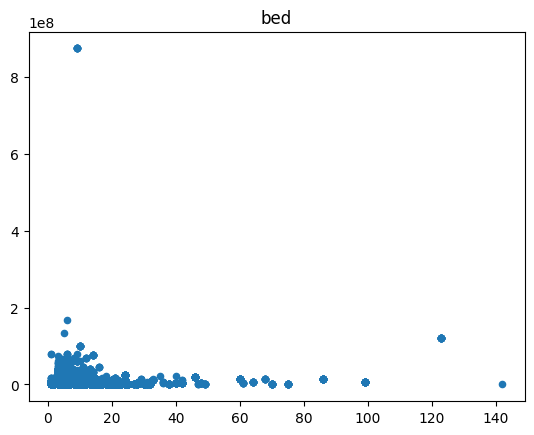

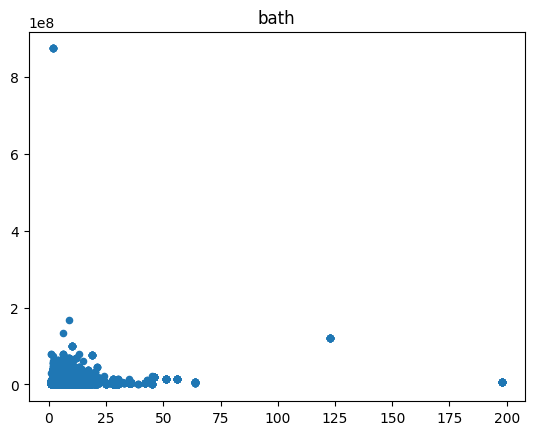

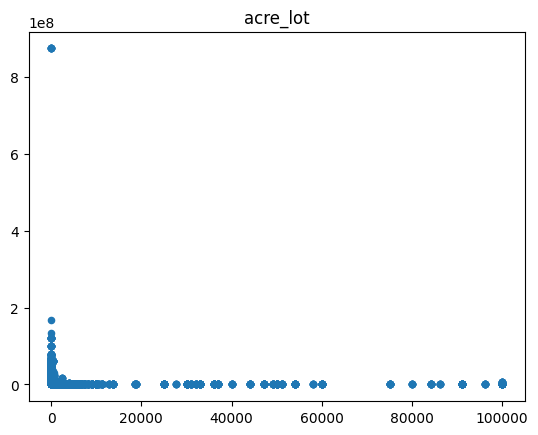

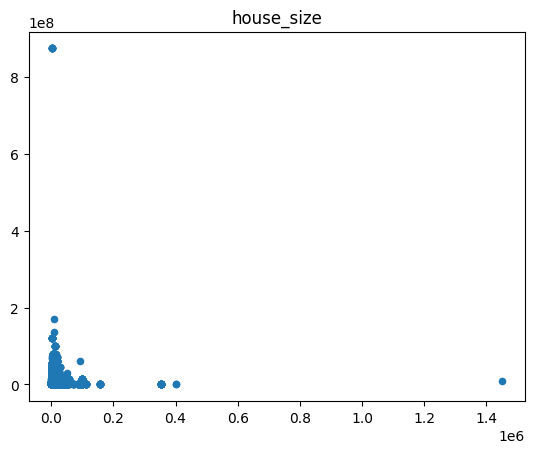

In [500]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.drop(["Sold"], axis=1, inplace=True)
numeric_df.drop(["price"], axis=1, inplace=True)

for i in numeric_df.columns:
    plt.scatter(numeric_df[i], df["price"], s = 20)
    plt.title(i)
    plt.show()




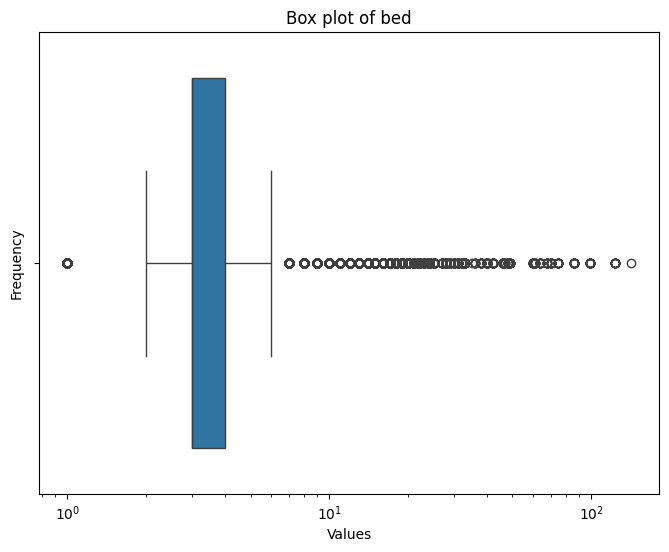

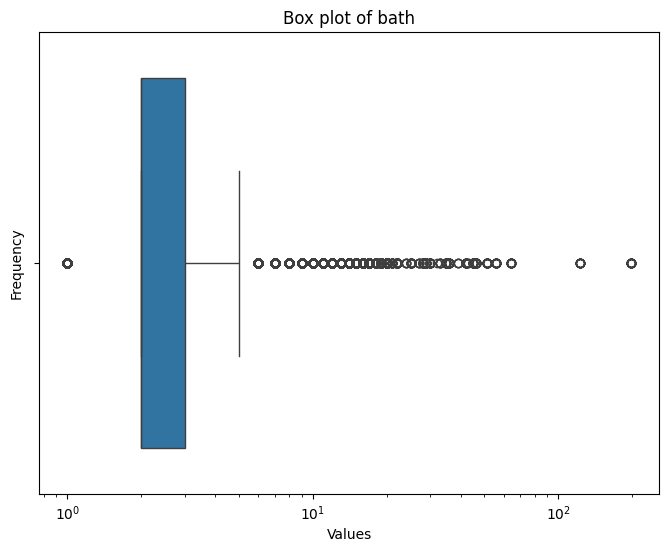

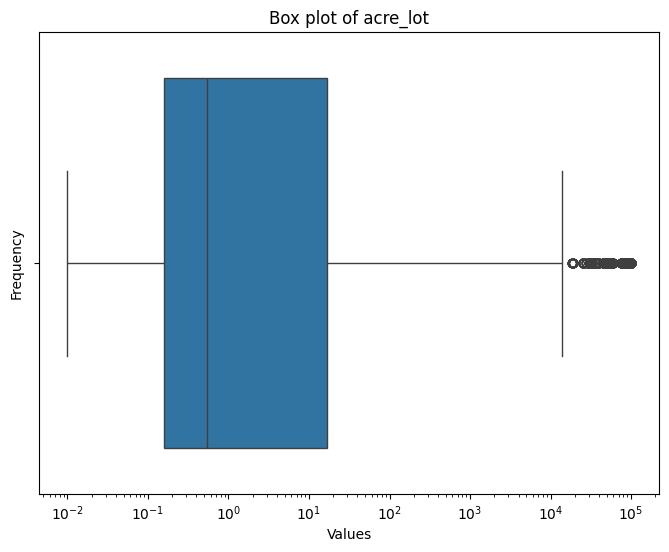

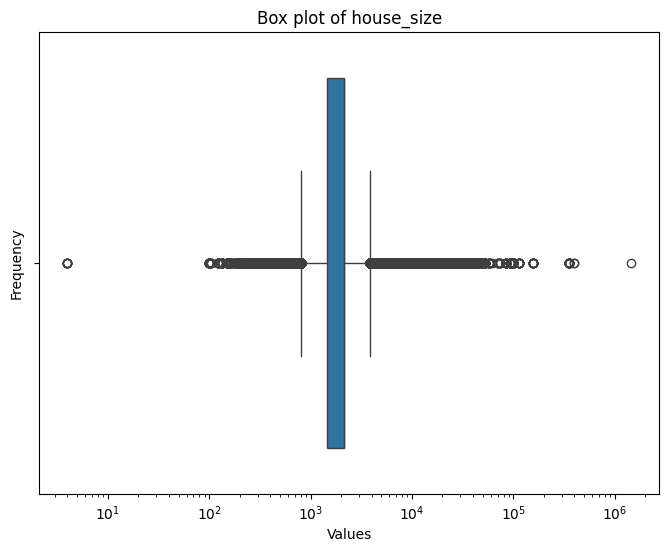

In [501]:
for column in numeric_df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=numeric_df[column], log_scale=True, orient='h')
    plt.title(f'Box plot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# using interquartile range to identify the outliers
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outlier = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
print(IQR)
print()
print("- Outlier lower bound:")
print(Q1- 1.5 * IQR)
print()
print("- Outlier upper bound:")
print(Q3 + 1.5 * IQR)

print()
print("- Number of outliers:")
for i in numeric_df.columns:
    print(i, ":", outlier[i].sum())
print()
print("- Percentage of outliers:")
for i in numeric_df.columns:
    print(i, ":", (outlier[i].sum()*100/len(outlier[i])))



bed              1.0
bath             1.0
acre_lot       16.63
house_size    700.26
dtype: Float64

- Outlier lower bound:
bed              1.5
bath             0.5
acre_lot     -24.785
house_size    392.61
dtype: Float64

- Outlier upper bound:
bed               5.5
bath              4.5
acre_lot       41.735
house_size    3193.65
dtype: Float64

- Number of outliers:
bed : 258215
bath : 103210
acre_lot : 43182
house_size : 183865

- Percentage of outliers:
bed : 12.90000429642108
bath : 5.156204881333849
acre_lot : 2.1573029666287984
house_size : 9.185598396535687


### Distribution

In [ ]:
print("- Statistical Overview")
print(numeric_df.describe())
print()
print("- Mean")
print(numeric_df.mean())
print()
print("- Median")
print(numeric_df.median())
print()
print("- Mode")
print(numeric_df.mode())
print()
print("- Standard Deviation")
print(numeric_df.std())
print()
print("- Skewness")
print(numeric_df.skew())


- Statistical Overview
             bed       bath      acre_lot    house_size
count  2001666.0  2001666.0  2.001666e+06  2.001666e+06
mean    3.320743   2.355024  2.758130e+01  2.143258e+03
std     1.726035   1.573252  1.080502e+03  2.489065e+03
min          1.0        1.0  0.000000e+00  4.000000e+00
25%          3.0        2.0  1.600000e-01  1.443000e+03
50%          3.0        2.0  5.400000e-01  2.143260e+03
75%          4.0        3.0  1.679000e+01  2.143260e+03
max        142.0      198.0  1.000000e+05  1.450112e+06

- Mean
bed              3.320743
bath             2.355024
acre_lot        27.581295
house_size    2143.258293
dtype: Float64

- Median
bed               3.0
bath              2.0
acre_lot         0.54
house_size    2143.26
dtype: Float64

- Mode
   bed  bath  acre_lot  house_size
0    3     2     27.58     2143.26

- Standard Deviation
bed             1.726035
bath            1.573252
acre_lot      1080.50207
house_size    2489.06487
dtype: Float64

- Skewness
bed   

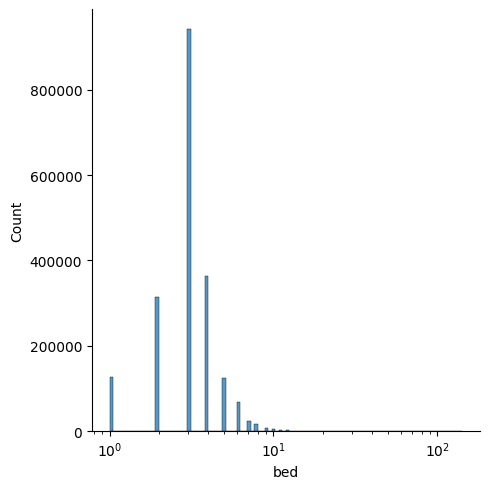

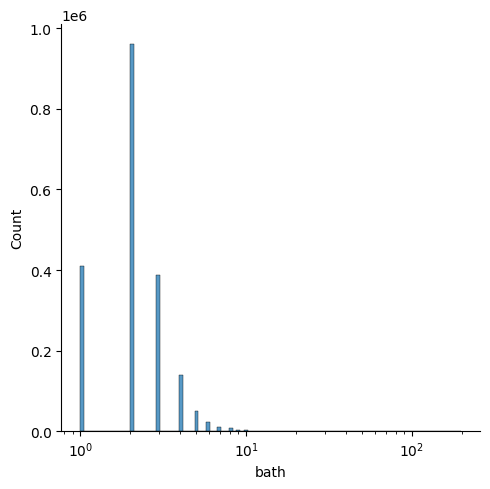

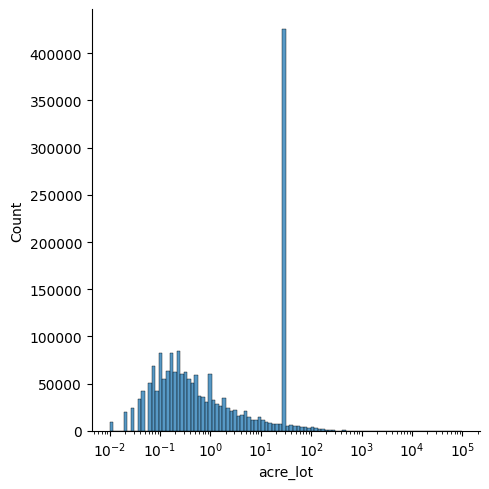

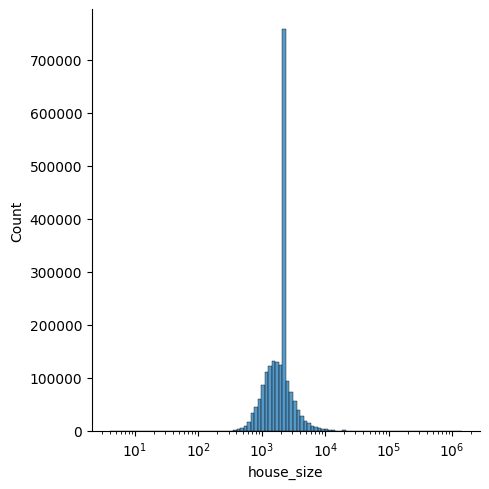

In [ ]:
for i in numeric_df.columns:
  sns.displot(data=numeric_df, x=i, bins=100, log_scale=True)


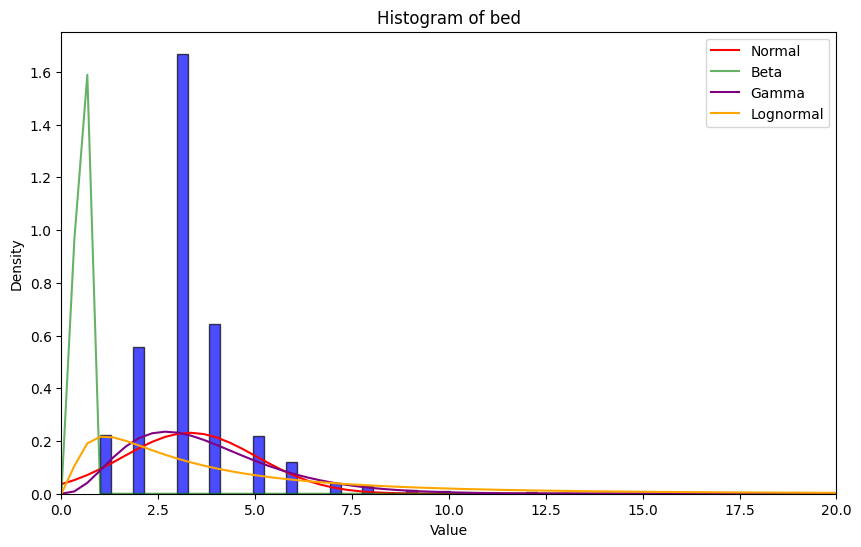

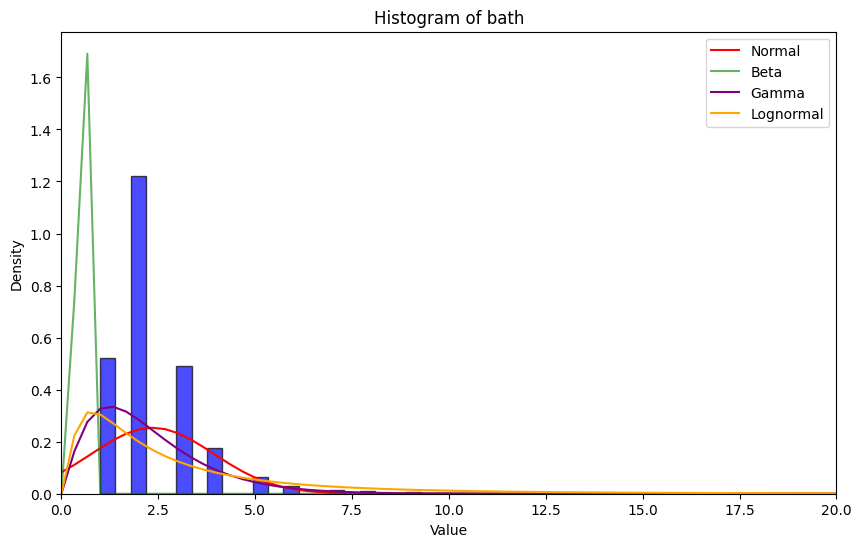

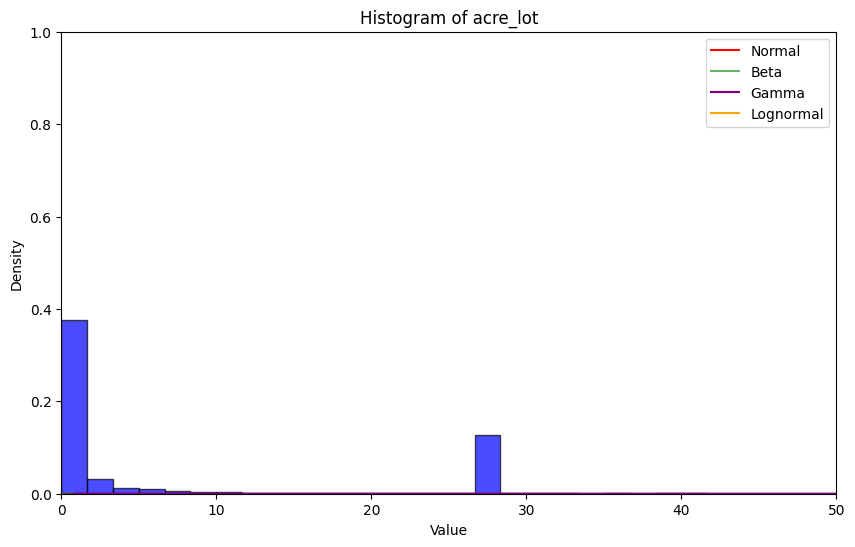

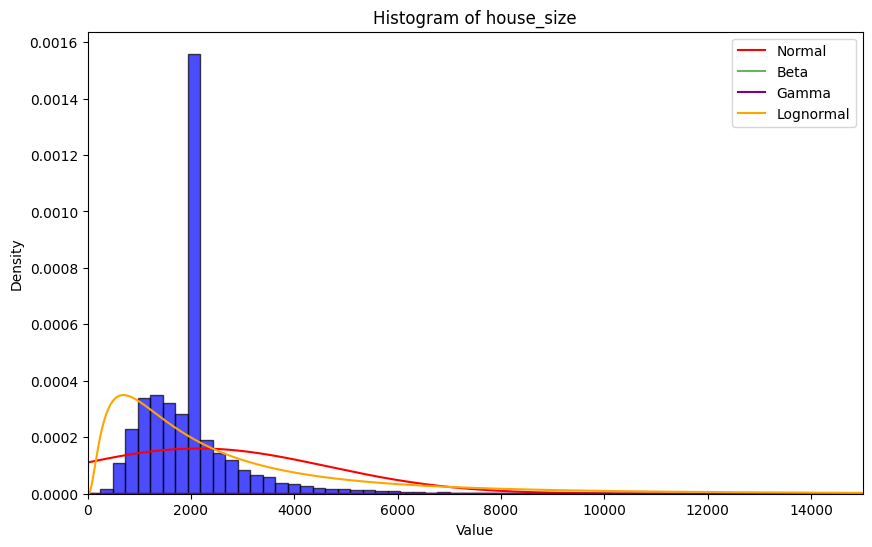

In [489]:

for i in numeric_df.columns:

    mean = numeric_df[i].mean()
    std = numeric_df[i].std()

    b = ( (mean * (1-mean)**2)/(std**2) ) - mean - 1
    a = (mean * b) / (1 - mean)
    k = mean**2 / (std**2)

    plt.figure(figsize=(10, 6))  
    plt.title(f'Histogram of {i}')  
    plt.xlabel('Value')  
    plt.ylabel('Density')  

    if (i == "house_size"):
        plt.hist(data= numeric_df, x=i, bins=6000, density=True, color= "blue" ,alpha=0.7, edgecolor='black') 
        plt.xlim(0,15000)
        x = np.linspace(0, 15000, 1000)

    elif (i == "acre_lot"):
        plt.hist(data= numeric_df, x=i, bins=60000, density=True, color= "blue" ,alpha=0.7, edgecolor='black') 
        plt.xlim(0,50)
        plt.ylim(0,1)
        x = np.linspace(0,50,60)
    else:
        plt.hist(data= numeric_df, x=i, bins=500, density=True, color= "blue" ,alpha=0.7, edgecolor='black') 
        plt.xlim(0,20)
        x = np.linspace(0,100, 300)

    b_x = np.linspace(0,1,100)

    pdf_norm = norm.pdf(x, np.mean(numeric_df[i]), np.std(numeric_df[i]))
    plt.plot(x, pdf_norm, label='Normal', color='red')

    pdf_beta = beta.pdf(x, abs(a),abs(b))  
    plt.plot(x, pdf_beta, label='Beta', color='green', alpha=0.6)

    pdf_gamma = gamma.pdf(x, k)  
    plt.plot(x, pdf_gamma, label='Gamma', color='purple')

    pdf_lognorm = lognorm.pdf(x, 1, loc=0, scale=np.exp(np.mean(np.log(numeric_df[i]))))
    plt.plot(x, pdf_lognorm, label='Lognormal', color='orange')
    plt.legend()
    plt.show()






need to figure out how to zabat the last 2 graphs

* either
    - bed had an almost normal distribution so z scaling would work for scaling the data
    - bath has a gamma distribution so 
    - acre_lot is beta so log scaling will be best 
    - house_size is closest to lognorm so log scaling will be best 
* or
    - theyre all normal but the graphs look weird because of outliers

### Scaling

putting down diff types so that we can decide which to use

In [487]:
# z scaling
scaler = StandardScaler()
numeric_df_copy_z = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# log scaling
numeric_df_copy_log = np.log1p(numeric_df)
numeric_df_copy_log.head()

# min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()
numeric_df_copy_minmax = pd.DataFrame(scaler_2.fit_transform(numeric_df))


